In [1]:
import numpy as np
from scipy.optimize import curve_fit, fsolve
from amid import AMID
import matplotlib.pyplot as plt

In [2]:
alphas = []
nalpha = 150
for i in np.arange(4, 600):
    g = lambda a: a/np.tan(a) - 1
    sol = fsolve(g, i)
    alphas.append(sol)
alphas = np.unique(np.around(alphas, 8))**2
alphas = alphas[:nalpha]

0.0
0.001
0.0031622
0.01
0.031622
0.1
0.3162


C:\Users\mitch\.conda\envs\Spyder425\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


1.0


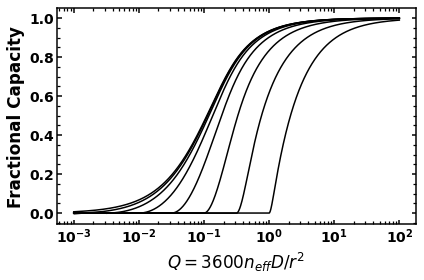

In [4]:
# Plot Atlung curve with various R_Ohm
R_Ohm = np.array([0.0, 1e-3, 3.1622e-3, 1e-2, 3.1622e-2, 1e-1, 3.162e-1, 1])
#R_Ohm = np.array([0.0])
nQ = 1000
A = 3
B = 5

tau_thr1 = np.zeros(len(R_Ohm))
Q_thr1 = np.zeros(len(R_Ohm))
tau_thr2 = np.zeros(len(R_Ohm))
Q_thr2 = np.zeros(len(R_Ohm))
with plt.style.context('grapher'):
    for i in range(len(R_Ohm)):
        print(R_Ohm[i])
        Q_arr = np.logspace(-3, 2, nQ)
        tau_sol = np.zeros(nQ)
        tau_guess = 0.5
        for j in range(nQ):
            Q = Q_arr[j]
            func = lambda tau: tau - 1 + (1/(A*Q))*(1/B - 2*(np.sum(np.exp(-alphas*tau*Q)/alphas))) + R_Ohm[i]/Q if R_Ohm[i]<Q else tau 
            tau_sol[j] = fsolve(func, tau_guess, factor=1.)

        for j in range(nQ):
            Q = Q_arr[j]
            if 1/B*0.01 < 2*(np.sum(np.exp(-alphas*tau_sol[j]*Q)/alphas)):
                tau_thr1[i] = tau_sol[j]
                Q_thr1[i] = Q_arr[j]

            if 1/B*0.5 < 2*(np.sum(np.exp(-alphas*tau_sol[j]*Q)/alphas)):
                tau_thr2[i] = tau_sol[j]
                Q_thr2[i] = Q_arr[j]

        plt.semilogx(Q_arr, tau_sol, '-k')

    #plt.semilogx(Q_thr1, tau_thr1)
    #plt.semilogx(Q_thr2, tau_thr2)
    plt.xlabel(r'$Q = 3600 n_{eff} D / r^2$')
    plt.ylabel('Fractional Capacity')